In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%load_ext autoreload
%autoreload 2

# SELLER P&L ANALYSIS

🎯 The goal of this exercise is to compute the P&L associated to each seller  

For each `seller_id` we need three items:  

- The **revenue**:
 - 10% fee on sales
 - 80 BRL per month on Olist


- The **cost**:
 - Review cost according to `{1: 100, 2: 50, 3: 40, 4: 0, 5: 0}` with review score as key and cost in BRL as value


- The **profit** made by Olist

💡 Let's not start from scratch  
❓ Import your seller training set and investigate what you already have.


In [9]:
# YOUR CODE HERE
from olist.seller import Seller

In [10]:
df_seller = Seller().get_training_data()
df_seller

,seller_id,seller_city,seller_state,delay_to_carrier,wait_time,date_first_sale,date_last_sale,months_on_olist,n_orders,quantity,quantity_per_order,sales,share_of_five_star,share_is_one_star,review_score
0,3442f8959a84dea7ee197c632cb2df15,campinas,SP,0.000000,13.018588,2017-05-05 16:25:11,2017-08-30 12:50:19,4.0,3,3,1.000000,218.70,0.33,0.33,3.00
1,d1b65fc7debc3361ea86b5f14c68d2e2,mogi guacu,SP,0.000000,9.065716,2017-03-29 02:10:34,2018-06-06 20:15:21,14.0,40,41,1.025000,11703.07,0.73,0.05,4.56
2,ce3ad9de960102d0677a81f5d0bb7b2d,rio de janeiro,RJ,0.000000,4.042292,2018-07-30 12:44:49,2018-07-30 12:44:49,0.0,1,1,1.000000,158.00,1.00,0.00,5.00
3,c0f3eea2e14555b6faeea3dd58c1b1c3,sao paulo,SP,0.000000,5.667187,2018-08-03 00:44:08,2018-08-03 00:44:08,0.0,1,1,1.000000,79.99,1.00,0.00,5.00
4,51a04a8a6bdcb23deccc82b0b80742cf,braganca paulista,SP,3.353727,35.314861,2017-11-14 12:15:25,2017-11-14 12:15:25,0.0,1,1,1.000000,167.99,0.00,1.00,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2962,98dddbc4601dd4443ca174359b237166,sarandi,PR,0.000000,8.230822,2018-07-14 03:10:19,2018-07-23 15:34:03,0.0,2,2,1.000000,158.00,1.00,0.00,5.00
2963,f8201cab383e484733266d1906e2fdfa,palhoca,SC,0.000000,13.045797,2017-06-17 15:30:11,2018-08-11 19:55:17,14.0,10,10,1.000000,889.00,0.50,0.10,4.10
2964,74871d19219c7d518d0090283e03c137,sao paulo,SP,0.000000,3.606625,2018-04-05 17:09:46,2018-08-21 19:25:15,5.0,6,7,1.166667,550.04,1.00,0.00,5.00
2965,e603cf3fec55f8697c9059638d6c8eb5,pelotas,RS,0.000000,6.657634,2017-02-09 02:43:17,2017-06-16 17:30:16,4.0,8,11,1.375000,297.00,0.64,0.00,4.45


❓ What is missing?  
Write down a strategy to get your missing columns  
Re-use as much of what has already been coded in `seller.py` as possible

In [11]:
from olist.data import Olist

data = Olist().get_data()

In [12]:
def agg(scores):
    return sum((np.array(scores) == 1) * 100) + sum((np.array(scores) == 2) * 50) + sum((np.array(scores) == 3) * 40)
    
        

In [13]:
data['order_items'].columns

Index(['order_id', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value'],
      dtype='object')

In [14]:
# know how much each seller cost
it_cost = 500_000
avg_it_cost = it_cost / data['orders'].shape[0]


## Merge the order_items table with order_reviews
df_order_items_reviews = data['order_items'].merge(data['order_reviews'], on ='order_id')
df_order_items_reviews

## Group by seller and order_id to get mean of the reviews
# df_grouped = df_order_items_reviews.groupby(['seller_id', 'order_id']).last()

# df_grouped['review_score'] = df_grouped['review_score'].apply(round)
# df_grouped['review_score'].value_counts()

# ## Apply the cost function on the grouped dataframe
# df_grouped['review_cost'] = df_grouped['review_score'].map({1:100, 2:50, 3:40, 4:0 , 5:0}) 
# df_grouped
## We merge the review cost table per seller with training seller table
df_seller_cost = df_order_items_reviews.groupby(['seller_id']).agg({'review_score': agg}).rename(columns = {'review_score': 'cost_of_bad_reviews'})
df_seller_cost = df_seller_cost.reset_index()



df_final_dataset = df_seller.merge(df_seller_cost, on ='seller_id')
df_final_dataset['avg_it_cost'] = round( df_final_dataset['n_orders'] * avg_it_cost, 2)
## Calculate the revenue
df_final_dataset['revenue'] = round( df_final_dataset['months_on_olist'] * 80 + df_final_dataset['sales'] * 0.1, 2)
## Calculate the profit
df_final_dataset['profit'] = round( df_final_dataset['revenue'] - (df_final_dataset['cost_of_bad_reviews'] + df_final_dataset['avg_it_cost']) , 2)
df_final_dataset

,seller_id,seller_city,seller_state,delay_to_carrier,wait_time,date_first_sale,date_last_sale,months_on_olist,n_orders,quantity,quantity_per_order,sales,share_of_five_star,share_is_one_star,review_score,cost_of_bad_reviews,avg_it_cost,revenue,profit
0,3442f8959a84dea7ee197c632cb2df15,campinas,SP,0.000000,13.018588,2017-05-05 16:25:11,2017-08-30 12:50:19,4.0,3,3,1.000000,218.70,0.33,0.33,3.00,140,15.08,341.87,186.79
1,d1b65fc7debc3361ea86b5f14c68d2e2,mogi guacu,SP,0.000000,9.065716,2017-03-29 02:10:34,2018-06-06 20:15:21,14.0,40,41,1.025000,11703.07,0.73,0.05,4.56,240,201.12,2290.31,1849.19
2,ce3ad9de960102d0677a81f5d0bb7b2d,rio de janeiro,RJ,0.000000,4.042292,2018-07-30 12:44:49,2018-07-30 12:44:49,0.0,1,1,1.000000,158.00,1.00,0.00,5.00,0,5.03,15.80,10.77
3,c0f3eea2e14555b6faeea3dd58c1b1c3,sao paulo,SP,0.000000,5.667187,2018-08-03 00:44:08,2018-08-03 00:44:08,0.0,1,1,1.000000,79.99,1.00,0.00,5.00,0,5.03,8.00,2.97
4,51a04a8a6bdcb23deccc82b0b80742cf,braganca paulista,SP,3.353727,35.314861,2017-11-14 12:15:25,2017-11-14 12:15:25,0.0,1,1,1.000000,167.99,0.00,1.00,1.00,100,5.03,16.80,-88.23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2962,98dddbc4601dd4443ca174359b237166,sarandi,PR,0.000000,8.230822,2018-07-14 03:10:19,2018-07-23 15:34:03,0.0,2,2,1.000000,158.00,1.00,0.00,5.00,0,10.06,15.80,5.74
2963,f8201cab383e484733266d1906e2fdfa,palhoca,SC,0.000000,13.045797,2017-06-17 15:30:11,2018-08-11 19:55:17,14.0,10,10,1.000000,889.00,0.50,0.10,4.10,140,50.28,1208.90,1018.62
2964,74871d19219c7d518d0090283e03c137,sao paulo,SP,0.000000,3.606625,2018-04-05 17:09:46,2018-08-21 19:25:15,5.0,6,7,1.166667,550.04,1.00,0.00,5.00,0,30.17,455.00,424.83
2965,e603cf3fec55f8697c9059638d6c8eb5,pelotas,RS,0.000000,6.657634,2017-02-09 02:43:17,2017-06-16 17:30:16,4.0,8,11,1.375000,297.00,0.64,0.00,4.45,50,40.22,349.70,259.48


In [15]:
#scales in square root of the number of the orders


In [16]:
df_final_dataset.sort_values('avg_it_cost')

,seller_id,seller_city,seller_state,delay_to_carrier,wait_time,date_first_sale,date_last_sale,months_on_olist,n_orders,quantity,quantity_per_order,sales,share_of_five_star,share_is_one_star,review_score,cost_of_bad_reviews,avg_it_cost,revenue,profit
2966,9e25199f6ef7e7c347120ff175652c3b,taubate,SP,0.0,8.199456,2017-03-27 10:10:27,2017-03-27 10:10:27,0.0,1,1,1.000000,12.50,0.00,0.00,4.00,0,5.03,1.25,-3.78
383,38f276ca6e7cc95a6d1bb55ac9e5550f,marilia,SP,0.0,5.200891,2017-11-26 18:19:34,2017-11-26 18:19:34,0.0,1,1,1.000000,24.99,1.00,0.00,5.00,0,5.03,2.50,-2.53
1445,07a9bc7f61396b658ddf3ac534efe44c,sao paulo,SP,0.0,5.995139,2017-06-26 11:55:25,2017-06-26 11:55:25,0.0,1,1,1.000000,119.90,0.00,0.00,3.50,40,5.03,11.99,-33.04
380,d93b8458c6fe139d85cfa5eadbf55bd2,sao paulo,SP,0.0,5.977627,2017-11-19 19:46:18,2017-11-19 19:46:18,0.0,1,1,1.000000,19.90,1.00,0.00,5.00,0,5.03,1.99,-3.04
2142,99a25c39b28a74d1151c35c18d178292,sao paulo,SP,0.0,2.230984,2018-06-14 02:57:10,2018-06-14 02:57:10,0.0,1,6,6.000000,173.94,1.00,0.00,5.00,0,5.03,17.39,12.36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1799,da8622b14eb17ae2831f4ac5b9dab84a,piracicaba,SP,0.0,11.169687,2017-02-05 22:02:04,2018-08-28 22:10:12,19.0,1314,1551,1.180365,160236.57,0.57,0.11,4.07,25960,6606.93,17543.66,-15023.27
453,1f50f920176fa81dab994f9023523100,sao jose do rio preto,SP,0.0,15.571831,2017-04-03 22:15:14,2018-08-28 03:45:18,17.0,1404,1931,1.375356,106939.21,0.57,0.15,3.98,37490,7059.46,12053.92,-32495.54
1357,cc419e0650a3c5ba77189a1882b7556a,santo andre,SP,0.0,11.539753,2017-02-02 17:10:21,2018-08-28 03:45:15,19.0,1706,1775,1.040445,104288.42,0.58,0.12,4.07,31070,8577.95,11948.84,-27699.11
2358,4a3ca9315b744ce9f8e9374361493884,ibitinga,SP,0.0,14.416471,2017-01-08 09:45:12,2018-08-27 11:04:18,20.0,1806,1987,1.100221,200472.92,0.48,0.15,3.80,44620,9080.76,21647.29,-32053.47


In [17]:
df_final_dataset.sort_values('n_orders')

,seller_id,seller_city,seller_state,delay_to_carrier,wait_time,date_first_sale,date_last_sale,months_on_olist,n_orders,quantity,quantity_per_order,sales,share_of_five_star,share_is_one_star,review_score,cost_of_bad_reviews,avg_it_cost,revenue,profit
2966,9e25199f6ef7e7c347120ff175652c3b,taubate,SP,0.0,8.199456,2017-03-27 10:10:27,2017-03-27 10:10:27,0.0,1,1,1.000000,12.50,0.00,0.00,4.00,0,5.03,1.25,-3.78
383,38f276ca6e7cc95a6d1bb55ac9e5550f,marilia,SP,0.0,5.200891,2017-11-26 18:19:34,2017-11-26 18:19:34,0.0,1,1,1.000000,24.99,1.00,0.00,5.00,0,5.03,2.50,-2.53
1445,07a9bc7f61396b658ddf3ac534efe44c,sao paulo,SP,0.0,5.995139,2017-06-26 11:55:25,2017-06-26 11:55:25,0.0,1,1,1.000000,119.90,0.00,0.00,3.50,40,5.03,11.99,-33.04
380,d93b8458c6fe139d85cfa5eadbf55bd2,sao paulo,SP,0.0,5.977627,2017-11-19 19:46:18,2017-11-19 19:46:18,0.0,1,1,1.000000,19.90,1.00,0.00,5.00,0,5.03,1.99,-3.04
2142,99a25c39b28a74d1151c35c18d178292,sao paulo,SP,0.0,2.230984,2018-06-14 02:57:10,2018-06-14 02:57:10,0.0,1,6,6.000000,173.94,1.00,0.00,5.00,0,5.03,17.39,12.36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1799,da8622b14eb17ae2831f4ac5b9dab84a,piracicaba,SP,0.0,11.169687,2017-02-05 22:02:04,2018-08-28 22:10:12,19.0,1314,1551,1.180365,160236.57,0.57,0.11,4.07,25960,6606.93,17543.66,-15023.27
453,1f50f920176fa81dab994f9023523100,sao jose do rio preto,SP,0.0,15.571831,2017-04-03 22:15:14,2018-08-28 03:45:18,17.0,1404,1931,1.375356,106939.21,0.57,0.15,3.98,37490,7059.46,12053.92,-32495.54
1357,cc419e0650a3c5ba77189a1882b7556a,santo andre,SP,0.0,11.539753,2017-02-02 17:10:21,2018-08-28 03:45:15,19.0,1706,1775,1.040445,104288.42,0.58,0.12,4.07,31070,8577.95,11948.84,-27699.11
2358,4a3ca9315b744ce9f8e9374361493884,ibitinga,SP,0.0,14.416471,2017-01-08 09:45:12,2018-08-27 11:04:18,20.0,1806,1987,1.100221,200472.92,0.48,0.15,3.80,44620,9080.76,21647.29,-32053.47


<AxesSubplot:xlabel='avg_it_cost', ylabel='cost_of_bad_reviews'>

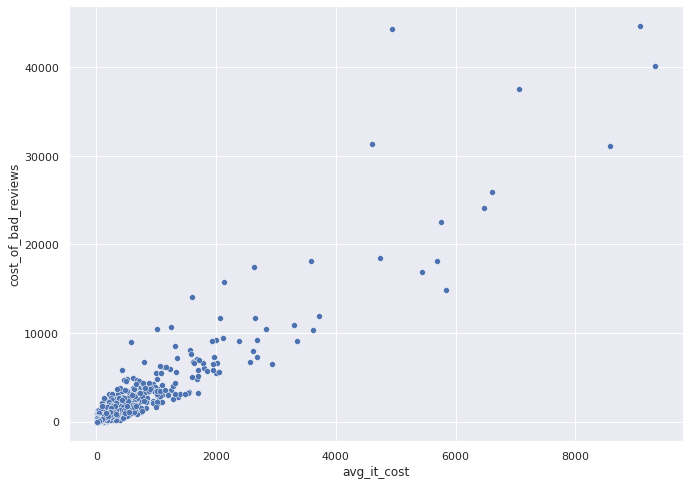

In [48]:
sns.scatterplot(x=df_final_dataset.avg_it_cost, y=df_final_dataset.cost_of_bad_reviews)

<AxesSubplot:xlabel='avg_it_cost', ylabel='n_orders'>

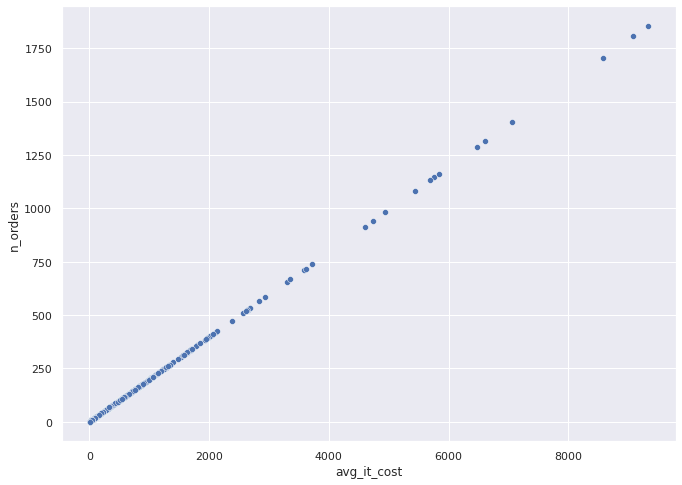

In [49]:
sns.scatterplot(x=df_final_dataset.avg_it_cost, y=df_final_dataset.n_orders)

<AxesSubplot:xlabel='cost_of_bad_reviews', ylabel='n_orders'>

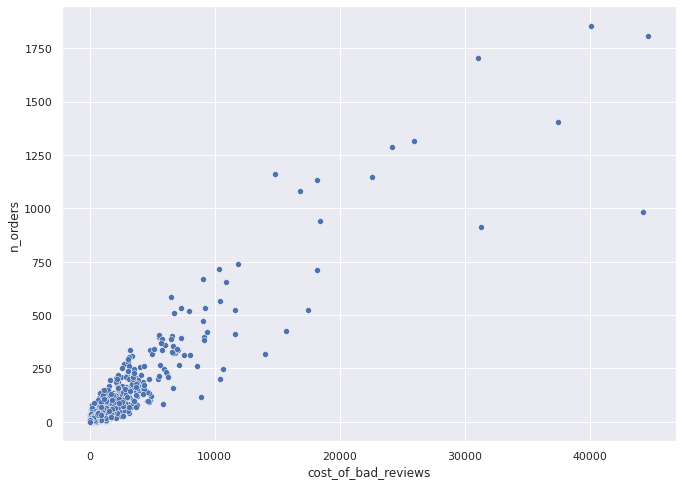

In [54]:
sns.scatterplot(x=df_final_dataset.cost_of_bad_reviews, y=df_final_dataset.n_orders)

<AxesSubplot:xlabel='revenue', ylabel='cost_of_bad_reviews'>

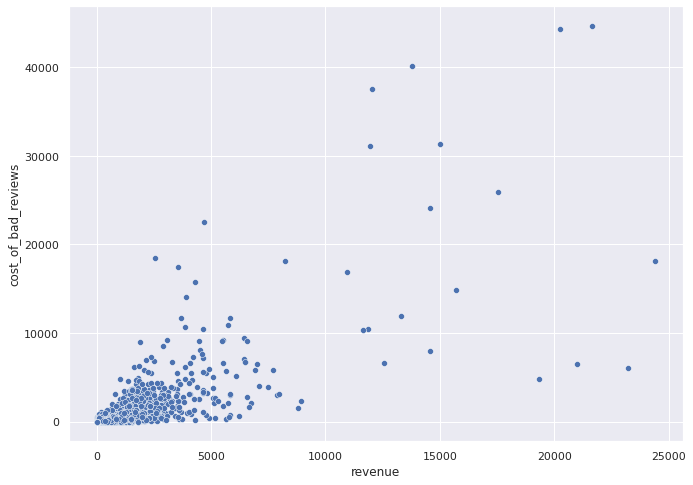

In [59]:
sns.scatterplot(x=df_final_dataset.revenue, y=df_final_dataset.n_orders)

<AxesSubplot:xlabel='review_score', ylabel='cost_of_bad_reviews'>

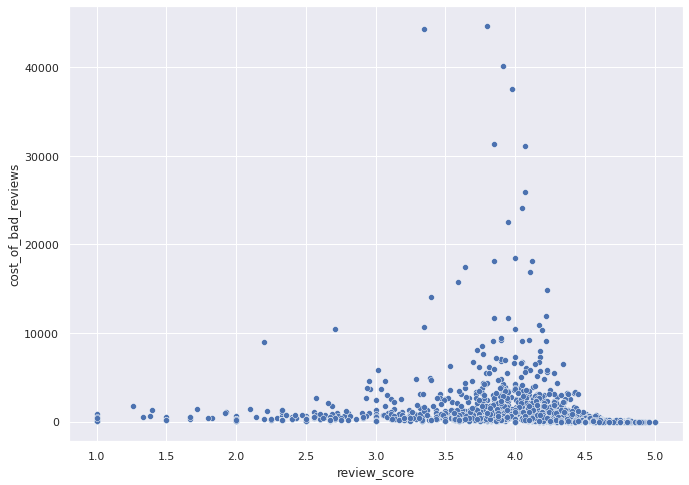

In [60]:
sns.scatterplot(x=df_final_dataset.review_score, y=df_final_dataset.cost_of_bad_reviews)

<AxesSubplot:>

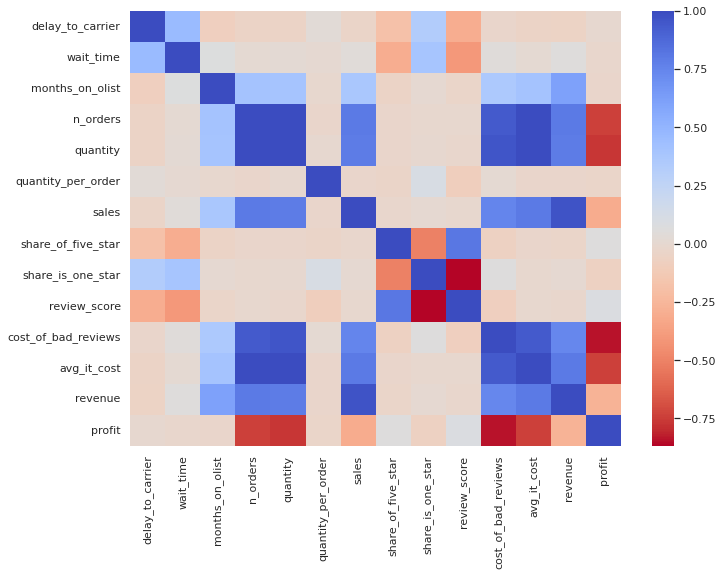

In [73]:
sns.heatmap(df_final_dataset.corr(), cmap='coolwarm_r', linecolor='w')

In [76]:
bad_reviews = round( (df_final_dataset.cost_of_bad_reviews.sum() / df_final_dataset.revenue.sum() )*100, 2)

it_cost = round( (df_final_dataset.avg_it_cost.sum() / df_final_dataset.revenue.sum() )*100, 2)

print(bad_reviews, it_cost)

70.95 18.02


In [19]:
df_losers = df_final_dataset[df_final_dataset.profit < 0]

bad_reviews = round( (df_losers.cost_of_bad_reviews.sum() / df_losers.revenue.sum() )*100, 2)

it_cost = round( (df_losers.avg_it_cost.sum() / df_losers.revenue.sum() )*100, 2)

print(bad_reviews, it_cost)

156.54 34.08


In [115]:
df_losers2 = df_losers[['seller_id','n_orders','review_score','cost_of_bad_reviews','revenue','profit']]

df_losers2['bad_reviews_revenue_ratio'] = round((df_losers2.cost_of_bad_reviews / df_losers2.revenue)*100, 2)

df_losers2 = df_losers2.sort_values('bad_reviews_revenue_ratio', ascending=False)

df_losers2 = df_losers2[df_losers2.bad_reviews_revenue_ratio < 100]

df_losers2

bad_reviews = round( (df_losers2.cost_of_bad_reviews.sum() / df_losers2.revenue.sum() )*100, 2)

bad_reviews

<ipython-input-115-a5e0b1b23e67>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



86.89

In [26]:
df_losers3 = df_losers[['seller_id','n_orders','review_score','cost_of_bad_reviews','avg_it_cost','revenue','profit']]

df_losers3['revenue_share'] = round( (df_losers3['revenue'] / df_losers3.revenue.sum())*100, 2)

df_losers3['revenue_cost%'] = round( (df_losers3.cost_of_bad_reviews / df_losers3.revenue)*100, 2)
df_losers3['revenue_it_cost%'] = round( (df_losers3.avg_it_cost / df_losers3.revenue)*100, 2)

df_losers3['net_profit_ratio%'] = round( ( (df_losers3.revenue - (df_losers3.cost_of_bad_reviews+df_losers3.avg_it_cost) )/df_losers3.revenue )*100, 2)

df_losers3['review_net_profit_margin'] = round( ( ( df_losers3.revenue - df_losers3.cost_of_bad_reviews )/df_losers3.revenue )*100, 2)

df_losers3 = df_losers3.sort_values('review_net_profit_margin', ascending=False)


pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)
df_losers3

<ipython-input-26-0197d4312d90>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_losers3['revenue_share'] = round( (df_losers3['revenue'] / df_losers3.revenue.sum())*100, 2)
<ipython-input-26-0197d4312d90>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_losers3['revenue_cost%'] = round( (df_losers3.cost_of_bad_reviews / df_losers3.revenue)*100, 2)
<ipython-input-26-0197d4312d90>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,c

,seller_id,n_orders,review_score,cost_of_bad_reviews,avg_it_cost,revenue,profit,revenue_share,revenue_cost%,revenue_it_cost%,net_profit_ratio%,review_net_profit_margin
2966,9e25199f6ef7e7c347120ff175652c3b,1,4.00,0,5.03,1.25,-3.78,0.00,0.00,402.40,-302.40,100.00
2584,139157dd4daa45c25b0807ffff348363,1,4.00,0,5.03,2.99,-2.04,0.00,0.00,168.23,-68.23,100.00
641,1c83418358f249c9d6affa52d579db0e,1,5.00,0,5.03,2.49,-2.54,0.00,0.00,202.01,-102.01,100.00
649,2ef086a599b597572aca4433b7ed6b3d,1,5.00,0,5.03,4.90,-0.13,0.00,0.00,102.65,-2.65,100.00
683,d7ab82074b5f1dfba46db123df101bff,2,4.33,0,10.06,3.87,-6.19,0.00,0.00,259.95,-159.95,100.00
2652,bd43e172d599bed47a85da877172ca8c,1,5.00,0,5.03,2.39,-2.64,0.00,0.00,210.46,-110.46,100.00
717,51e0557bc7b86de13e946c60ee91ce39,1,5.00,0,5.03,4.58,-0.45,0.00,0.00,109.83,-9.83,100.00
2618,7d81e74a4755b552267cd5e081563028,1,4.00,0,5.03,3.25,-1.78,0.00,0.00,154.77,-54.77,100.00
2614,668bf321538e5072858eaef6087ce027,1,5.00,0,5.03,1.99,-3.04,0.00,0.00,252.76,-152.76,100.00
2596,6c77cd583b36a13aacccf2b3ee23e233,1,5.00,0,5.03,1.89,-3.14,0.00,0.00,266.14,-166.14,100.00


In [ ]:
df_losers.sort_values('

❓ Make a copy of `seller.py`, rename it `seller_updated.py` and update it accordingly

> YOUR ANSWER HERE

❓ Compute seller profits

> YOUR ANSWER HERE

❓ Load your updated DataFrame

<AxesSubplot:xlabel='seller_id', ylabel='profit'>

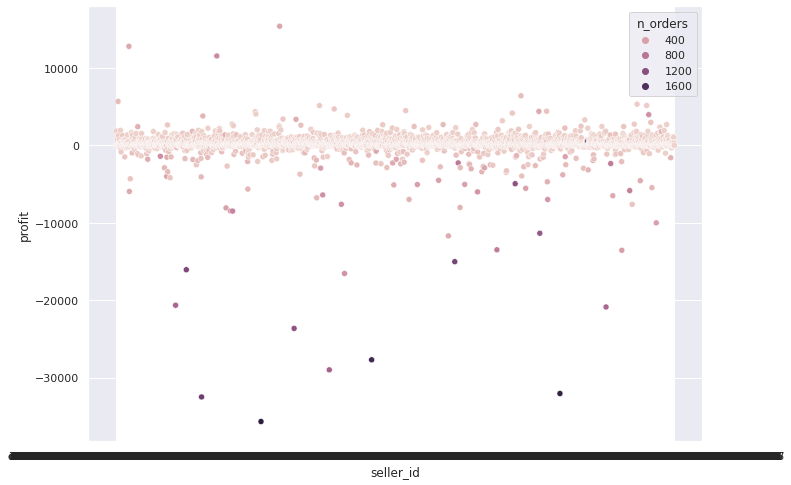

In [44]:
import seaborn as sns

sns.set(rc={'figure.figsize':(11,8)})
sns.scatterplot(y=df_losers.profit, x=df_losers.seller_id, hue=df_losers.n_orders)


<AxesSubplot:xlabel='profit', ylabel='Count'>

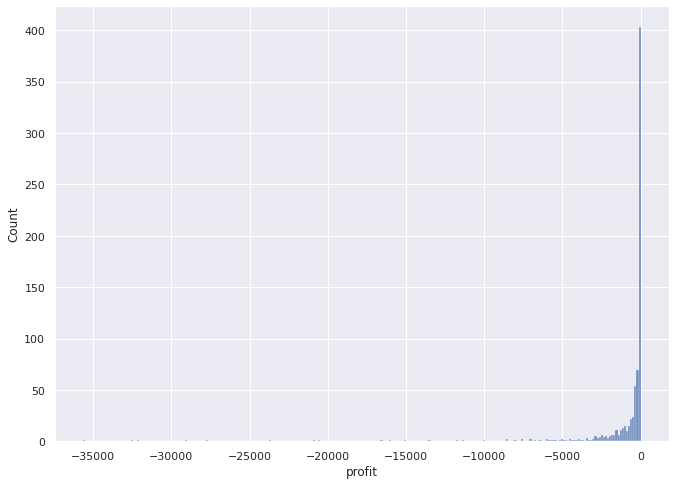

In [85]:
df_losers
sns.histplot(x=df_losers.profit[df_losers.profit < 5000])


❓ Sort sellers by profit, and analyse their profitability: conclude on a possible strategy for Olist!

In [82]:
from olist.product import Product
from olist.data import Olist


products = Product().get_training_data()

items = Olist().get_data()['order_items']

sellers_products = pd.merge(products, items, on='product_id')
sellers_products = pd.merge(df_final_dataset, sellers_products, on='seller_id')


<AxesSubplot:>

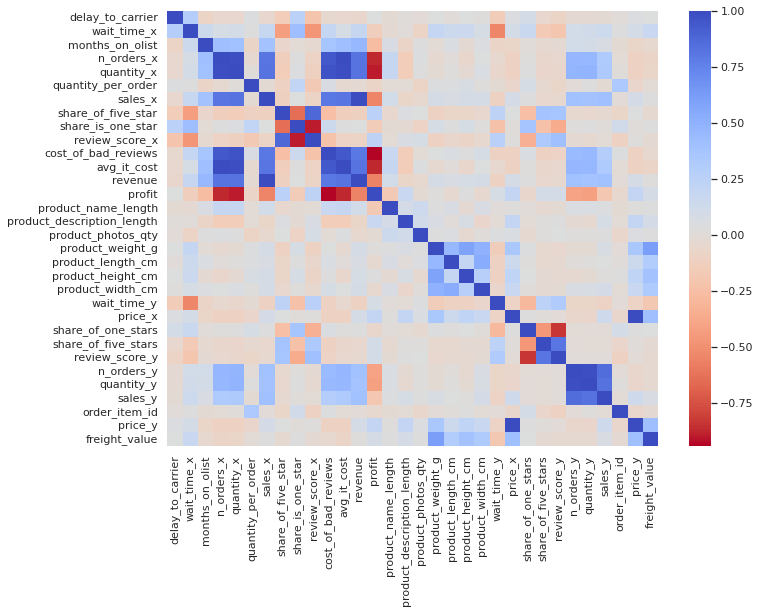

In [83]:
sns.heatmap(sellers_products.corr(), cmap='coolwarm_r')

In [1]:
from olist.order import Order

orders = Order().get_training_data()
orders.sort_values('expected_wait_time')

,order_id,wait_time,expected_wait_time,delay_vs_expected,order_status,dim_is_five_star,dim_is_one_star,review_score,number_of_products,number_of_sellers,price,freight_value
92489,a9bcf1a7fe9234ce388f78f3902dfcae,2.0,2.0,-1.0,delivered,1.0,0.0,5.0,1.0,1.0,35.90,8.76
82236,d3920d21fca6f163bb21d3fbf37270a7,3.0,2.0,1.0,delivered,1.0,0.0,5.0,2.0,1.0,29.80,14.78
26469,56a88710573842db37ac692a3252a761,1.0,2.0,-1.0,delivered,0.0,0.0,4.0,1.0,1.0,205.00,13.74
86006,171b95be9dfea0748f5bb8f017882f8f,3.0,2.0,0.0,delivered,1.0,0.0,5.0,1.0,1.0,161.99,18.34
56895,7ee45000199ae00051ea0d2b996b66df,2.0,2.0,-1.0,delivered,1.0,0.0,5.0,1.0,1.0,16.90,7.87
...,...,...,...,...,...,...,...,...,...,...,...,...
65830,40dc2ba6f322a17626aac6244332828c,7.0,116.0,-109.0,delivered,1.0,0.0,5.0,1.0,1.0,40.00,14.10
84319,c2bb89b5c1dd978d507284be78a04cb2,16.0,140.0,-124.0,delivered,1.0,0.0,5.0,2.0,1.0,199.98,122.88
15427,c72727d29cde4cf870d569bf65edabfd,6.0,146.0,-140.0,delivered,1.0,0.0,5.0,1.0,1.0,25.90,26.09
39102,0607f0efea4b566f1eb8f7d3c2397320,3.0,149.0,-147.0,delivered,1.0,0.0,5.0,2.0,1.0,125.98,20.18


<AxesSubplot:xlabel='delay_vs_expected', ylabel='review_score'>

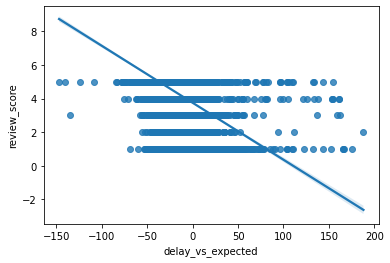

In [3]:
import seaborn as sns

sns.regplot(y=orders.review_score, x=orders.delay_vs_expected)

<AxesSubplot:>

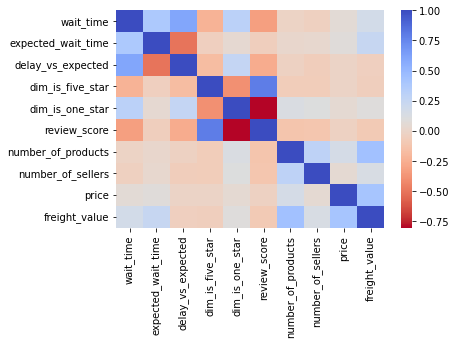

In [6]:
sns.heatmap(orders.corr(), cmap='coolwarm_r')

In [33]:
df1 = df_losers3[df_losers3.review_net_profit_margin > 0 ]

print(df1.profit.sum(), df_losers.profit.sum())

df1


-34567.60999999999 -797771.0499999999


,seller_id,n_orders,review_score,cost_of_bad_reviews,avg_it_cost,revenue,profit,revenue_share,revenue_cost%,revenue_it_cost%,net_profit_ratio%,review_net_profit_margin
2966,9e25199f6ef7e7c347120ff175652c3b,1,4.00,0,5.03,1.25,-3.78,0.00,0.00,402.40,-302.40,100.00
2584,139157dd4daa45c25b0807ffff348363,1,4.00,0,5.03,2.99,-2.04,0.00,0.00,168.23,-68.23,100.00
641,1c83418358f249c9d6affa52d579db0e,1,5.00,0,5.03,2.49,-2.54,0.00,0.00,202.01,-102.01,100.00
649,2ef086a599b597572aca4433b7ed6b3d,1,5.00,0,5.03,4.90,-0.13,0.00,0.00,102.65,-2.65,100.00
683,d7ab82074b5f1dfba46db123df101bff,2,4.33,0,10.06,3.87,-6.19,0.00,0.00,259.95,-159.95,100.00
2652,bd43e172d599bed47a85da877172ca8c,1,5.00,0,5.03,2.39,-2.64,0.00,0.00,210.46,-110.46,100.00
717,51e0557bc7b86de13e946c60ee91ce39,1,5.00,0,5.03,4.58,-0.45,0.00,0.00,109.83,-9.83,100.00
2618,7d81e74a4755b552267cd5e081563028,1,4.00,0,5.03,3.25,-1.78,0.00,0.00,154.77,-54.77,100.00
2614,668bf321538e5072858eaef6087ce027,1,5.00,0,5.03,1.99,-3.04,0.00,0.00,252.76,-152.76,100.00
2596,6c77cd583b36a13aacccf2b3ee23e233,1,5.00,0,5.03,1.89,-3.14,0.00,0.00,266.14,-166.14,100.00
